In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:

# Load inbuilt Titanic dataset
df = sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
# Step 2: Data Preprocessing
# 1. Check for Missing Values

print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
 # Handle missing values
# 1. Fill missing 'age' with the median
df['age'] = df['age'].fillna(df['age'].median())

# 2. Drop 'deck' column due to excessive missing values
df.drop(columns=['deck'], inplace=True)

# 3. Fill missing 'embarked' and 'embark_town' with the mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Check for missing values after handling
print("\nMissing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


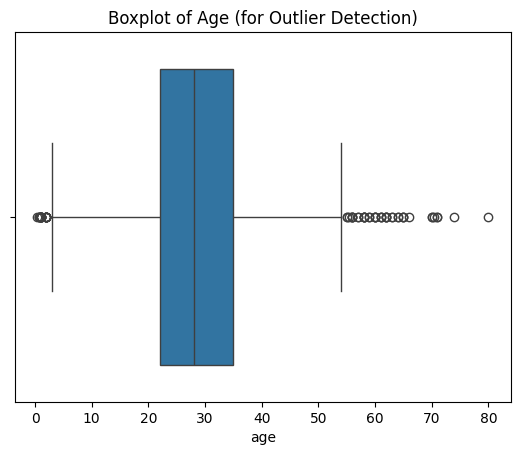

In [7]:
# Check for Outliers in Age

import matplotlib.pyplot as plt
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age (for Outlier Detection)')
plt.show()

In [8]:
# Scale/Normalize Age (if modeling)
# For visualization, scaling isn't necessary, but here’s how you'd do it:


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])

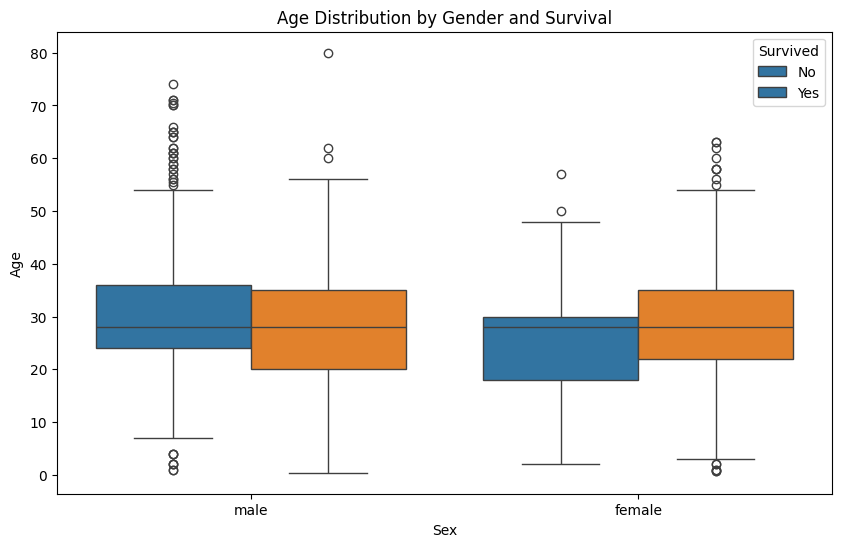

In [9]:
# Create the Boxplot
# Now, plot the boxplot for age distribution grouped by sex and survived.

plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', hue='survived', data=df)
plt.title('Age Distribution by Gender and Survival')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [10]:
# Step 4: Observations
# X-axis (Sex): Two categories — male and female.

# Y-axis (Age): Age of passengers.

# Hue (Color Legend):

# Blue = Did not survive (Survived = 0)

# Orange = Survived (Survived = 1)

# So, for each gender, you're seeing two boxes:

# One box for those who did not survive

# One for those who did survive

#  Observations from the Boxplot
#  Males:
# Blue box (Did not survive):

# Median age is around 30 years.

# Wide interquartile range (IQR): large number of adult males didn't survive.

# Several outliers above age 60 and below 10.

# Orange box (Survived):

# Lower median (~25 years or less).

# Slightly smaller IQR.

# Suggests that younger males were more likely to survive — possibly children.

#  Females:
# Orange box (Survived):

# Median age is slightly above 30 years.

# IQR spans a wider range than males — women of all ages had better survival chances.

# Few outliers (very young children and older women also survived).
# # Key insights you may observe from the boxplot:

# Females generally survived more than males.

# Among survivors:

# Females of all ages had relatively higher survival rates.

# Young children (especially male children) had higher survival chances.

# Among non-survivors:

# Males dominate, and the age range is wide, suggesting survival was not strongly age-biased among them.

# Older males had lower survival.

# Outliers in age exist in both genders — likely older passengers or infants.

